In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Single mass

In [2]:
l = 10
k = 5
d1 = 3
d2 = l - d1
m = 4

v0 = 0
x0 = 2
dt = 0.001

In [3]:
xi, vi, f1i, f2i, ti = [], [], [], [], np.arange(0, 100, dt)

In [4]:
x = x0
v = v0
for t in ti:
    dd1 = x - d1
    dd2 = (l-x) - d2
    f1 = -k*dd1
    f2 = -k*dd2
    fw = f1 - f2
    a = fw/m
    v += a*dt
    x += v*dt
    xi.append(x)
    f1i.append(f1)
    f2i.append(f2)
    vi.append(v)

In [5]:
def get_color(f, fmax, fmin):
    if f > 0:
        return (1-f/fmax, 1-0.5*(f/fmax), 0)
    else:
        return (1, 1-f/fmin, 0)

In [6]:
fig, ax = plt.subplots()
fmax = max(max(f1i), max(f2i))
fmin = min(min(f1i), min(f2i))
def animate(i):
    ax.clear()
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 10)
    ax.scatter(xi[i], 0, c='b')
    ax.plot([0, xi[i]], [0, 0], c=get_color(f1i[i], fmax, fmin))
    ax.plot([xi[i], l], [0, 0], c=get_color(f2i[i], fmax, fmin))
ani = animation.FuncAnimation(fig, animate, frames=range(0, len(ti), len(ti)//1000))
ani.save('plots/01-spring.gif', writer='pillow')
plt.close()

# Two masses

In [7]:
l = 10
k = 1
d1 = 3
d2 = 5
d3 = l - d1 - d2

m1 = 3
m2 = 6

v10 = 0
v20 = 0
x10 = 2
x20 = 9
dt = 0.001

In [8]:
x1i, x2i, v1i, v2i, f11i, f12i, f21i, f22i, ti = [], [], [], [], [], [], [], [], np.arange(0, 100, dt)

In [9]:
x1, x2 = x10, x20
v1, v2 = v10, v20
for t in ti:
    dd1 = x1 - d1
    dd2 = x2 - x1 - d2
    dd3 = l - x2 - d3
    
    f11 = -k*dd1
    f12 = -0.5*k*dd2
    fw1 = f11 - f12
    
    f21 = -0.5*k*dd2
    f22 = -k*dd3
    fw2 = f21 - f22
    
    a1 = fw1 / m1
    v1 += a1 * dt
    x1 += v1 * dt
    
    a2 = fw2 / m2
    v2 += a2 * dt
    x2 += v2 * dt
    
    x1i.append(x1)
    x2i.append(x2)
    v1i.append(v1)
    v2i.append(v2)
    f11i.append(f11)
    f12i.append(f12)
    f21i.append(f21)
    f22i.append(f22)
    

In [10]:
fig, ax = plt.subplots()
fmax = max(max(f11i), max(f12i), max(f21i), max(f22i))
fmin = min(min(f11i), min(f12i), min(f21i), min(f22i))
def animate(i):
    ax.clear()
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 10)
    ax.scatter(x1i[i], 0, c='b')
    ax.scatter(x2i[i], 0, c='m')
    ax.plot([0, x1i[i]], [0, 0], c=get_color(f11i[i], fmax, fmin))
    ax.plot([x1i[i], (x2i[i]+x1i[i])/2], [0, 0], c=get_color(f12i[i], fmax, fmin))
    ax.plot([(x2i[i]+x1i[i])/2, x2i[i]], [0, 0], c=get_color(f22i[i], fmax, fmin))
    ax.plot([x2i[i], l], [0, 0], c=get_color(f21i[i], fmax, fmin))
ani = animation.FuncAnimation(fig, animate, frames=range(0, len(ti), len(ti)//1000))
ani.save('plots/01-2-mass-spring.gif', writer='pillow')
plt.close()

# General solution

In [11]:
l = 10
k = 0.1

d0 = 1
ds = np.array([2, 3, 2]).astype(float)
dn = l - d0 - np.sum(ds)

n = len(ds) + 1

ms = np.array([2, 3, 1, 6]).astype(float)
v0s = np.zeros_like(ms).astype(float)
x0s = np.array([3, 5, 6, 9]).astype(float)
dt = 0.001

In [12]:
ti = np.arange(0, 100, dt)
xi, vi, fi1, fi2 = (
    np.zeros((n, len(ti))).astype(float),
    np.zeros((n, len(ti))).astype(float),
    np.zeros((n, len(ti))).astype(float),
    np.zeros((n, len(ti))).astype(float),
)

In [13]:
xs = x0s.copy()
vs = v0s.copy()
for t_idx, t in enumerate(ti):
    # calc deltas for each spring
    dd0 = xs[0] - d0
    ddn = l - xs[n - 1] - dn

    dds = [xs[idx + 1] - xs[idx] - ds[idx] for idx in range(0, n - 1)]

    # calc springs' forces
    fi1[0, t_idx] = -k * dd0
    fi2[-1, t_idx] = -k * ddn
    for spring_idx in range(1, n):
        fi1[spring_idx, t_idx] = -0.5 * k * dds[spring_idx - 1]
        fi2[spring_idx - 1, t_idx] = -0.5 * k * dds[spring_idx - 1]

    # calc resultant forces
    fws = fi1[:, t_idx] - fi2[:, t_idx]
    as_ = fws / ms
    vs += as_ * dt
    xs += vs * dt

    # store values
    xi[:, t_idx] = xs
    vi[:, t_idx] = vs

In [14]:
fig, ax = plt.subplots()
fmax = max(np.max(fi1), np.max(fi2))
fmin = min(np.min(fi1), np.min(fi2))
def animate(i):
    xs = xi[:, i]
    ax.clear()
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 10)
    ax.scatter(xs, np.zeros_like(xs), c='b')
    ax.plot([0, xs[0]], [0, 0], c=get_color(fi1[0, i], fmax, fmin))
    ax.plot([xs[-1], l], [0, 0], c=get_color(fi2[-1, i], fmax, fmin))
    
    for idx in range(1, n):
        ax.plot([xs[idx-1], (xs[idx]+xs[idx-1])/2], [0, 0], c=get_color(fi2[idx-1, i], fmax, fmin))
        ax.plot([(xs[idx]+xs[idx-1])/2, xs[idx]], [0, 0], c=get_color(fi1[idx, i], fmax, fmin))
        
ani = animation.FuncAnimation(fig, animate, frames=range(0, len(ti), len(ti)//1000))
ani.save('plots/01-general-spring.gif', writer='pillow')
plt.close()

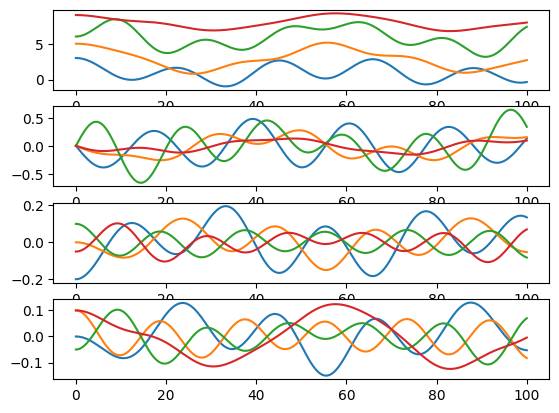

In [15]:
fig, axs = plt.subplots(4,1)
for idx in range(n):
    axs[0].plot(ti, xi[idx])
    axs[1].plot(ti, vi[idx])
    axs[2].plot(ti, fi1[idx])
    axs[3].plot(ti, fi2[idx])